In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [4]:
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [5]:
df['Data'] = pd.to_datetime(df['Data'])


In [6]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,2000-01-11,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,2000-01-18,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,2000-01-25,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2000-02-01,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2000-02-08,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,2021-04-13,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [21]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Y            0
Data         0
XAU BGNL     0
ECSURPUS     0
BDIY         0
CRY          0
DXY          0
JPY          0
GBP          0
Cl1          0
VIX          0
USGG30YR     0
GT10         0
USGG2YR      0
USGG3M       0
US0001M      0
GTDEM30Y     0
GTDEM10Y     0
GTDEM2Y      0
EONIA        0
GTITL30YR    0
GTITL10YR    0
GTITL2YR     0
GTJPY30YR    0
GTJPY10YR    0
GTJPY2YR     0
GTGBP30Y     0
GTGBP20Y     0
GTGBP2Y      0
LUMSTRUU     0
LMBITR       0
LUACTRUU     0
LF98TRUU     0
LG30TRUU     0
LP01TREU     0
EMUSTRUU     0
LF94TRUU     0
MXUS         0
MXEU         0
MXJP         0
MXBR         0
MXRU         0
MXIN         0
MXCN         0
dtype: int64


In [10]:
correlation_matrix = df.corr()


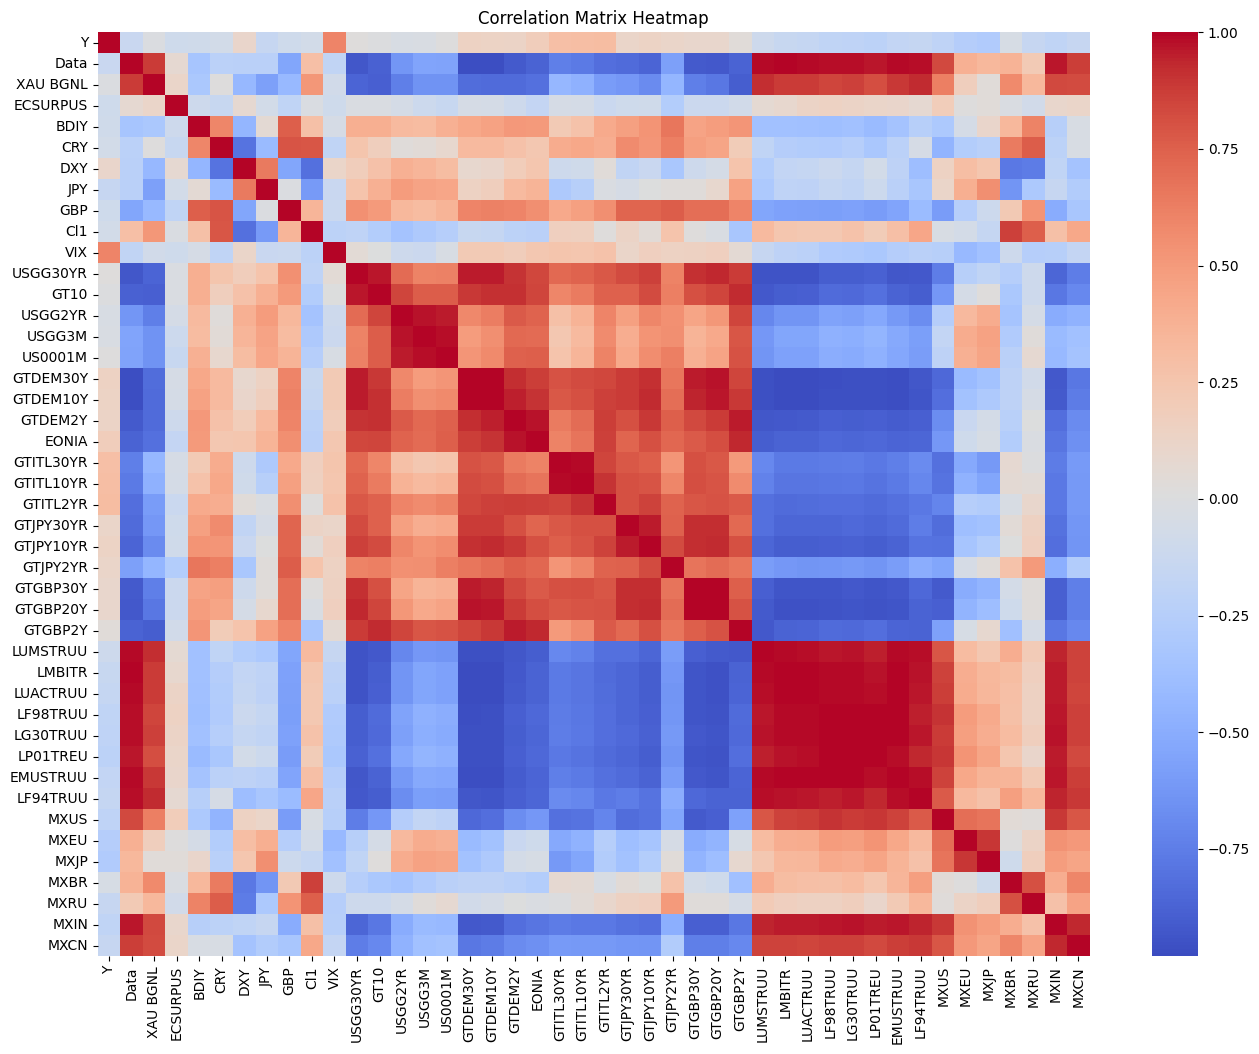

In [11]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

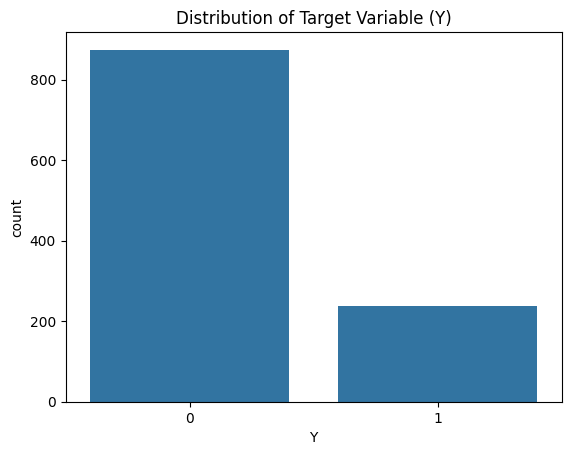

In [12]:
sns.countplot(x='Y', data=df)
plt.title('Distribution of Target Variable (Y)')
plt.show()

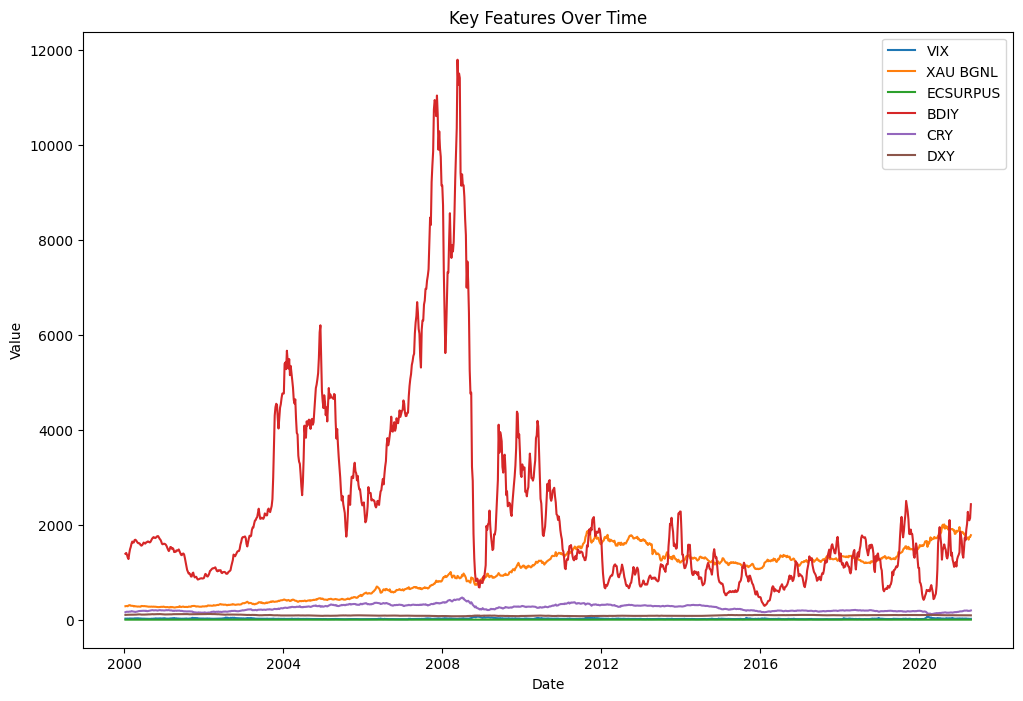

In [17]:
key_columns = [ 'VIX', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY']
plt.figure(figsize=(12, 8))
for col in key_columns:
    plt.plot(df['Data'], df[col], label=col)

plt.legend()
plt.title('Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

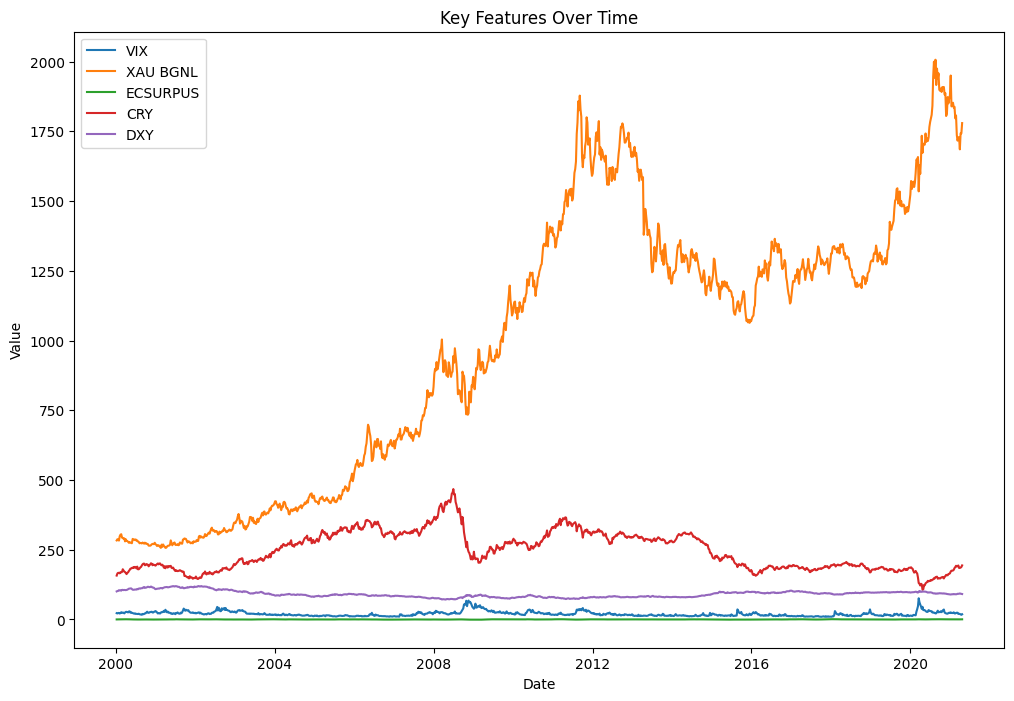

In [18]:
key_columns = [ 'VIX', 'XAU BGNL', 'ECSURPUS', 'CRY', 'DXY']
plt.figure(figsize=(12, 8))
for col in key_columns:
    plt.plot(df['Data'], df[col], label=col)

plt.legend()
plt.title('Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

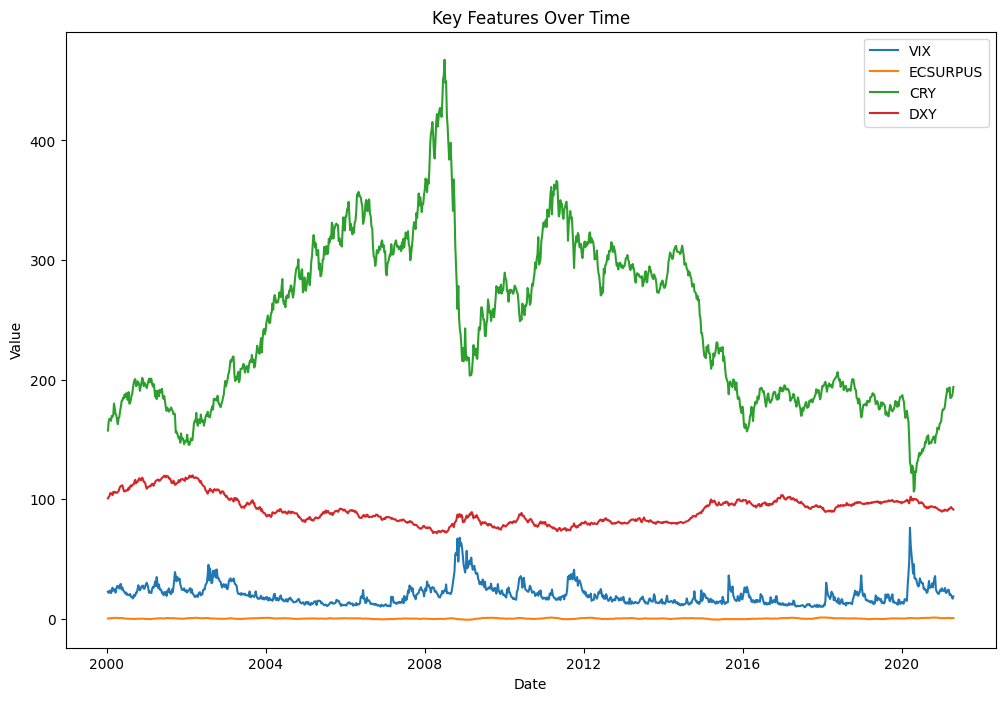

In [20]:
key_columns = [ 'VIX', 'ECSURPUS',  'CRY', 'DXY']
plt.figure(figsize=(12, 8))
for col in key_columns:
    plt.plot(df['Data'], df[col], label=col)

plt.legend()
plt.title('Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [22]:
corr_with_target = df.corr()['Y'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (Y):")
print(corr_with_target)


Correlation with Target Variable (Y):
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
Data        -0.136997
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.

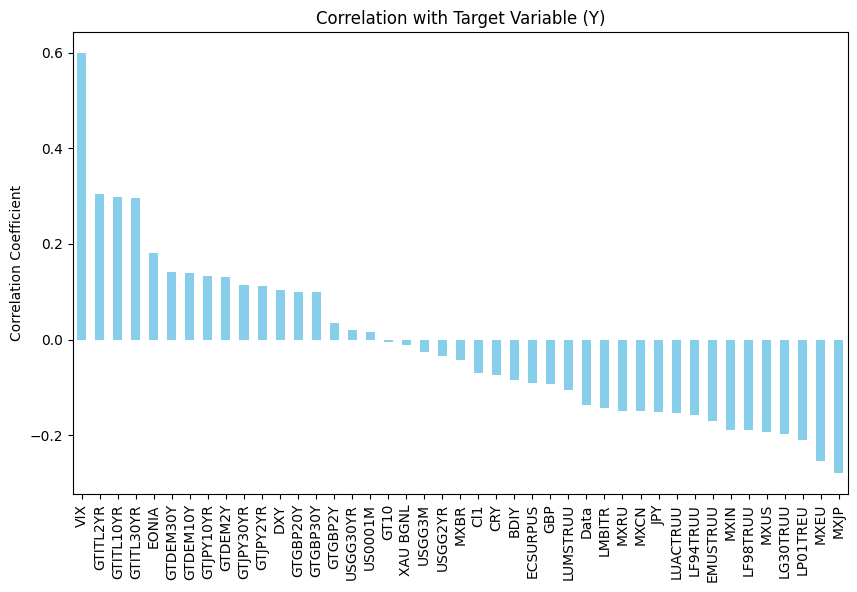

In [23]:
plt.figure(figsize=(10, 6))
corr_with_target.drop('Y').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable (Y)')
plt.ylabel('Correlation Coefficient')
plt.show()


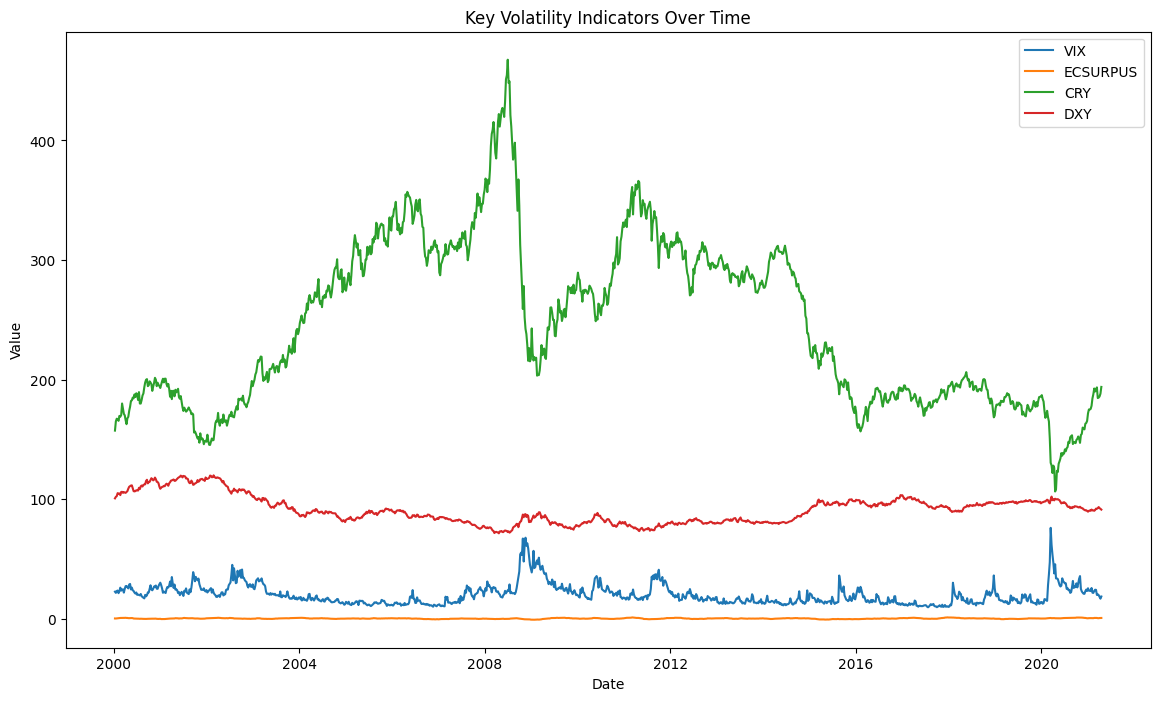

In [24]:
plt.figure(figsize=(14, 8))
for col in key_columns:
    plt.plot(df['Data'], df[col], label=col)

plt.legend()
plt.title('Key Volatility Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

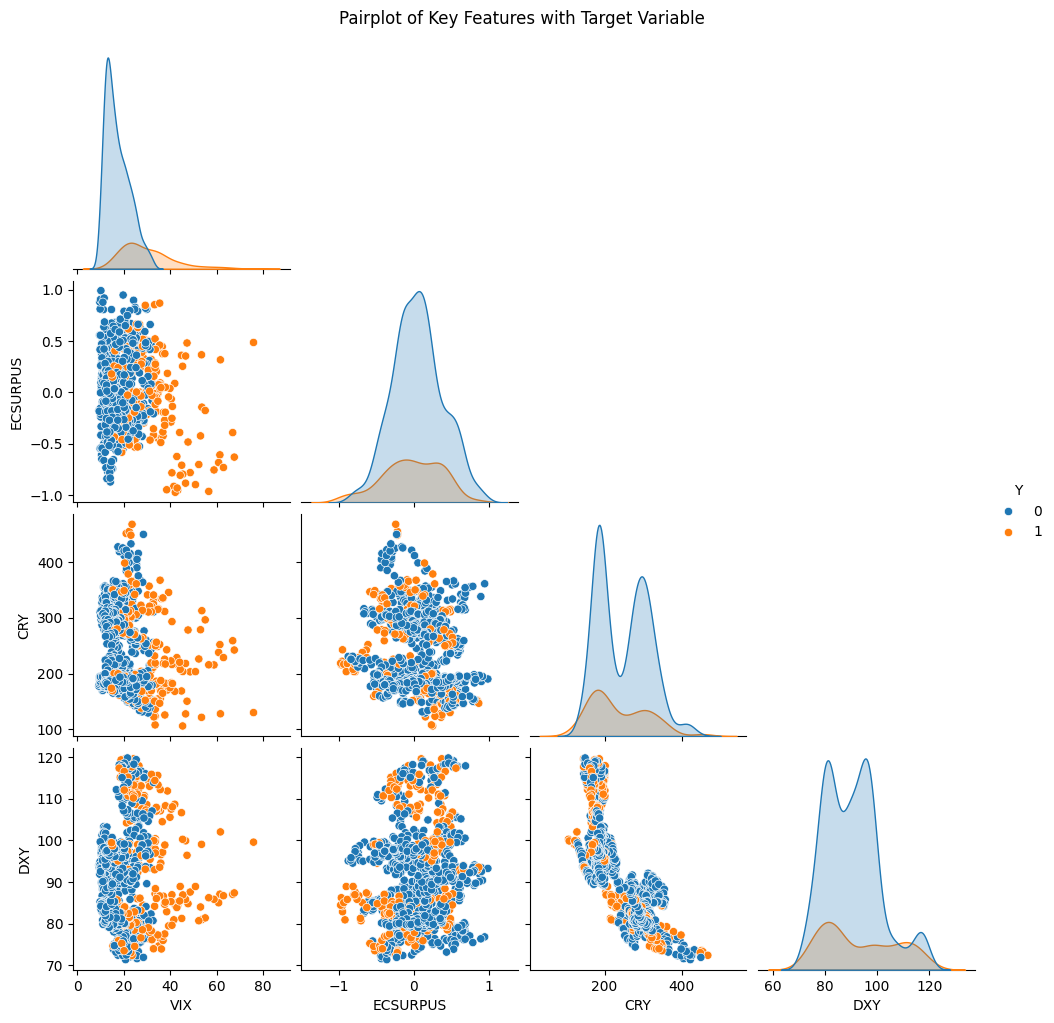

In [25]:
sns.pairplot(df[key_columns + ['Y']], hue='Y', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Features with Target Variable', y=1.02)
plt.show()

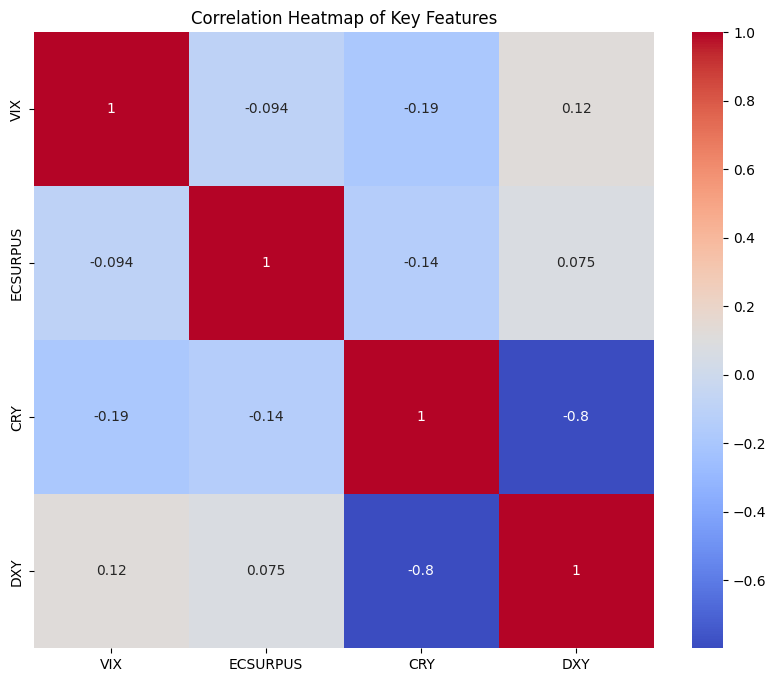

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[key_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features')
plt.show()

In [31]:
# Z-score method for numeric anomalies
def detect_anomalies_zscore(data, threshold=3):
    return np.abs(zscore(data)) > threshold

anomalies = {}
for col in key_columns:
    anomalies[col] = detect_anomalies_zscore(df[col])

for col, anomaly in anomalies.items():
    print(f"\nAnomalies detected in {col}:\n", df.loc[anomaly, ['Data', col]])


Anomalies detected in VIX:
            Data    VIX
456  2008-10-07  53.68
457  2008-10-14  55.13
458  2008-10-21  53.11
459  2008-10-28  66.96
460  2008-11-04  47.73
461  2008-11-11  61.44
462  2008-11-18  67.64
463  2008-11-25  60.90
464  2008-12-02  62.98
465  2008-12-09  58.91
466  2008-12-16  52.37
471  2009-01-20  56.65
474  2009-02-10  46.67
475  2009-02-17  48.66
477  2009-03-03  50.93
1052 2020-03-10  47.30
1053 2020-03-17  75.91
1054 2020-03-24  61.67
1055 2020-03-31  53.54
1056 2020-04-07  46.70

Anomalies detected in ECSURPUS:
 Empty DataFrame
Columns: [Data, ECSURPUS]
Index: []

Anomalies detected in CRY:
           Data     CRY
440 2008-06-17  451.18
441 2008-06-24  454.61
442 2008-07-01  467.57

Anomalies detected in DXY:
 Empty DataFrame
Columns: [Data, DXY]
Index: []


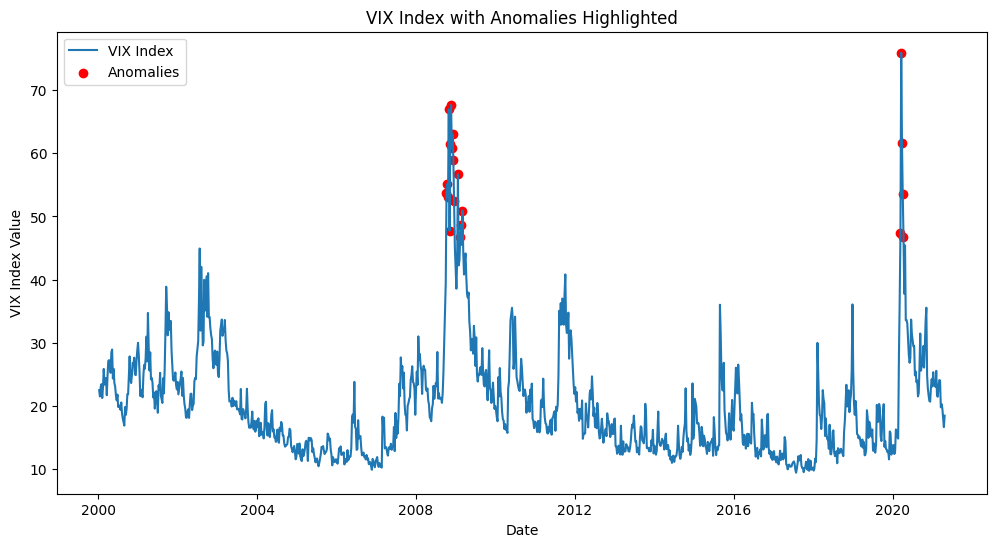

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['VIX'], label='VIX Index')
plt.scatter(df.loc[anomalies['VIX'], 'Data'], df.loc[anomalies['VIX'], 'VIX'], 
            color='red', label='Anomalies')
plt.title('VIX Index with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Index Value')
plt.legend()
plt.show()

In [45]:
print( df.columns.tolist())


['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP', 'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']


In [38]:
# IQR method for numeric anomalies
def detect_anomalies_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

anomalies_iqr = {}
for col in key_columns:
    anomalies_iqr[col] = detect_anomalies_iqr(df[col])

In [39]:
for col, anomaly in anomalies_iqr.items():
    print(f"\nIQR-based anomalies in {col}:\n", df.loc[anomaly, ['Data', col]])


IQR-based anomalies in VIX:
            Data    VIX
88   2001-09-18  38.87
132  2002-07-23  44.92
134  2002-08-06  42.03
138  2002-09-03  39.97
141  2002-09-24  40.52
143  2002-10-08  41.02
455  2008-09-30  39.39
456  2008-10-07  53.68
457  2008-10-14  55.13
458  2008-10-21  53.11
459  2008-10-28  66.96
460  2008-11-04  47.73
461  2008-11-11  61.44
462  2008-11-18  67.64
463  2008-11-25  60.90
464  2008-12-02  62.98
465  2008-12-09  58.91
466  2008-12-16  52.37
467  2008-12-23  45.02
468  2008-12-30  41.63
470  2009-01-13  43.27
471  2009-01-20  56.65
472  2009-01-27  42.25
473  2009-02-03  43.06
474  2009-02-10  46.67
475  2009-02-17  48.66
476  2009-02-24  45.49
477  2009-03-03  50.93
478  2009-03-10  44.37
479  2009-03-17  40.80
480  2009-03-24  42.93
481  2009-03-31  44.14
482  2009-04-07  40.39
612  2011-10-04  40.82
1052 2020-03-10  47.30
1053 2020-03-17  75.91
1054 2020-03-24  61.67
1055 2020-03-31  53.54
1056 2020-04-07  46.70
1058 2020-04-21  45.41

IQR-based anomalies in ECS

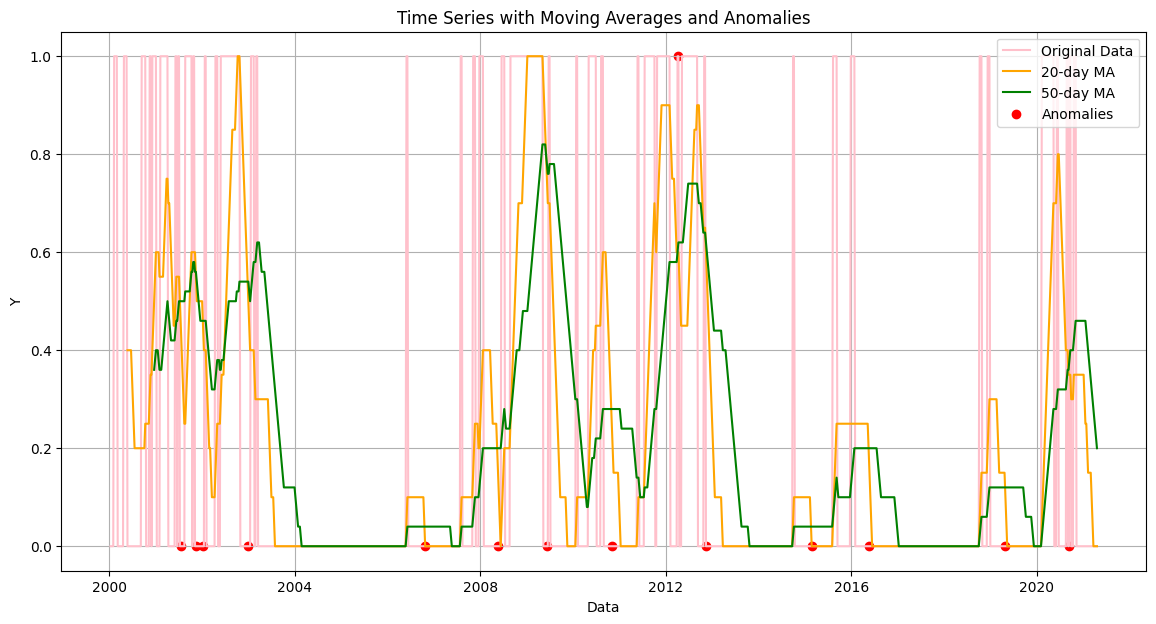

In [53]:
# Moving Average - Finding death cross
df['20_MA'] = df['Y'].rolling(window=20).mean()
df['50_MA'] = df['Y'].rolling(window=50).mean()

df['Anomaly'] = ((df['20_MA'] < df['50_MA']) & (df['20_MA'].shift(1) >= df['50_MA'].shift(1))).astype(int)

plt.figure(figsize=(14, 7))
plt.plot(df['Data'], df['Y'], label='Original Data', color='pink')
plt.plot(df['Data'], df['20_MA'], label='20-day MA', color='orange')
plt.plot(df['Data'], df['50_MA'], label='50-day MA', color='green')
plt.scatter(df['Data'][df['Anomaly'] == 1], df['Y'][df['Anomaly'] == 1], color='red', label='Anomalies')
plt.title('Time Series with Moving Averages and Anomalies')
plt.xlabel('Data')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In [63]:
from sklearn.impute import SimpleImputer

In [64]:

imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numeric_df)

In [65]:
scaled_data = StandardScaler().fit_transform(imputed_data)


In [66]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [67]:
explained_variance = pca.explained_variance_ratio_


In [68]:
cumulative_variance = np.cumsum(explained_variance)


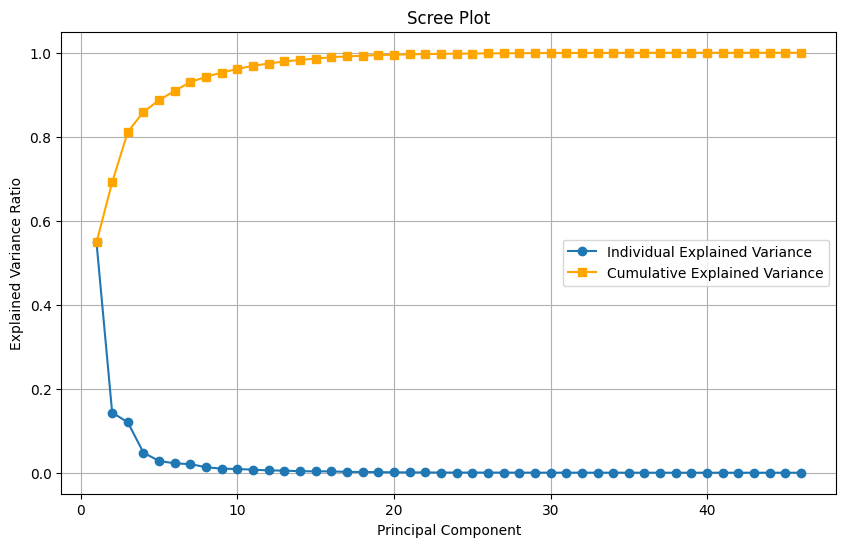

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative Explained Variance', color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

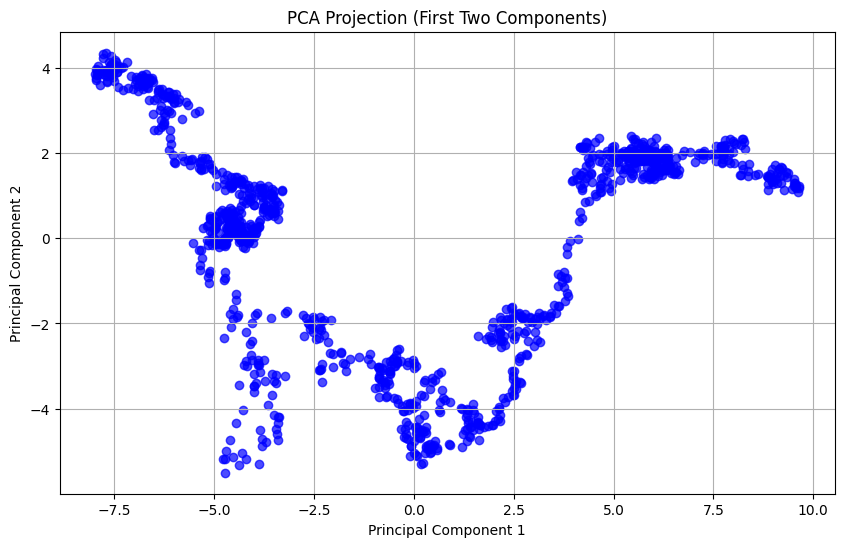

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (First Two Components)')
plt.grid()
plt.show()

In [71]:
loading_matrix = pd.DataFrame(pca.components_, columns=numeric_df.columns)
print("PCA Component Loadings:")
print(loading_matrix)

PCA Component Loadings:
           Y  XAU BGNL  ECSURPUS      BDIY       CRY       DXY       JPY  \
0  -0.032721  0.171558  0.024354 -0.087034 -0.064214 -0.024554 -0.038707   
1  -0.041459 -0.164295  0.025193 -0.127205 -0.302771  0.345926  0.304954   
2  -0.184870 -0.013120 -0.025989  0.241854  0.192221 -0.130632  0.098061   
3   0.396022  0.121814 -0.111811  0.035908 -0.068068  0.077805 -0.061451   
4  -0.100317  0.119442  0.590511 -0.257664 -0.035362  0.113778 -0.261200   
5  -0.153296 -0.007422  0.091529  0.102389 -0.026237  0.015974  0.074406   
6   0.054230 -0.040770  0.684242  0.365433 -0.073620 -0.061007  0.133986   
7   0.733179 -0.021773  0.163451 -0.054638  0.102599 -0.050261 -0.036565   
8  -0.069496  0.030057  0.184508  0.036454  0.162472 -0.206773 -0.246110   
9  -0.259981  0.000425 -0.063305 -0.056373 -0.134343 -0.193994 -0.473266   
10  0.015390 -0.070316 -0.143273  0.582251 -0.128217  0.084018 -0.141283   
11  0.363551 -0.105470 -0.046141  0.010434 -0.086063 -0.032275 -